## **In-Depth Exploration of Player Feedback:** “A Baldur's Gate 3” Steam Review’s Textual Analysis

### *Data Entry*

In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load CSV data into a DataFrame with error handling
try:
    df = pd.read_csv("BG3_reviews_updated.csv", delimiter=',', on_bad_lines='skip')
except pd.errors.ParserError as e:
    print(f"Error reading CSV file: {e}")

df.columns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['recommendationid', 'language', 'review', 'timestamp_created',
       'timestamp_updated', 'voted_up', 'votes_up', 'votes_funny',
       'weighted_vote_score', 'written_during_early_access', 'comment_count',
       'steam_purchase', 'received_for_free'],
      dtype='object')

### *Stop words and Lemmatization*

In [2]:
stop_words = set(nltk.corpus.stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

Function to preprocess data by converting reviews to lowercase, removing special characters, punctuations, white spaces, stop words and short tokens while tokenizing and lemmatizing.

In [3]:
def preprocess_review(review): # this function is meant to preprocess the reviews
     if isinstance(review, str):
        # Convert to lowercase
        review = review.lower()

        # Remove special characters, punctuation, and extra whitespaces
        review = ''.join(e for e in review if e.isalnum() or e.isspace())

        # Tokenize the review
        tokens = word_tokenize(review)

        # Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Remove stopwords and short tokens
        filtered_tokens = [token for token in lemmatized_tokens if token not in stop_words and len(token) > 2]

        return filtered_tokens
     else:
        return []

This funtion is meant to test out a bigram model before the removal of stop words. This is done to check if meaningful words group exist in the reviews that may be useful in interpretation without exclustion.

In [4]:
def forbigram(review): # This function is to test out bigram distribution without the exclusion of stopwords
     if isinstance(review, str):
        # Convert to lowercase
        review = review.lower()

        # Remove special characters, punctuation, and extra whitespaces
        review = ''.join(e for e in review if e.isalnum() or e.isspace())

        # Tokenize the review
        tokens = word_tokenize(review)

        return tokens
     else:
        return []

This segement is to plot out the afformentioned bigram model


Top 10 Most Common Words (Bigrams):
[(('this', 'game'), 25054), (('the', 'game'), 24299), (('of', 'the'), 20703), (('game', 'is'), 11532), (('in', 'the'), 10815), (('this', 'is'), 9353), (('if', 'you'), 9219), (('baldurs', 'gate'), 8629), (('is', 'a'), 7737), (('i', 'have'), 7702)]


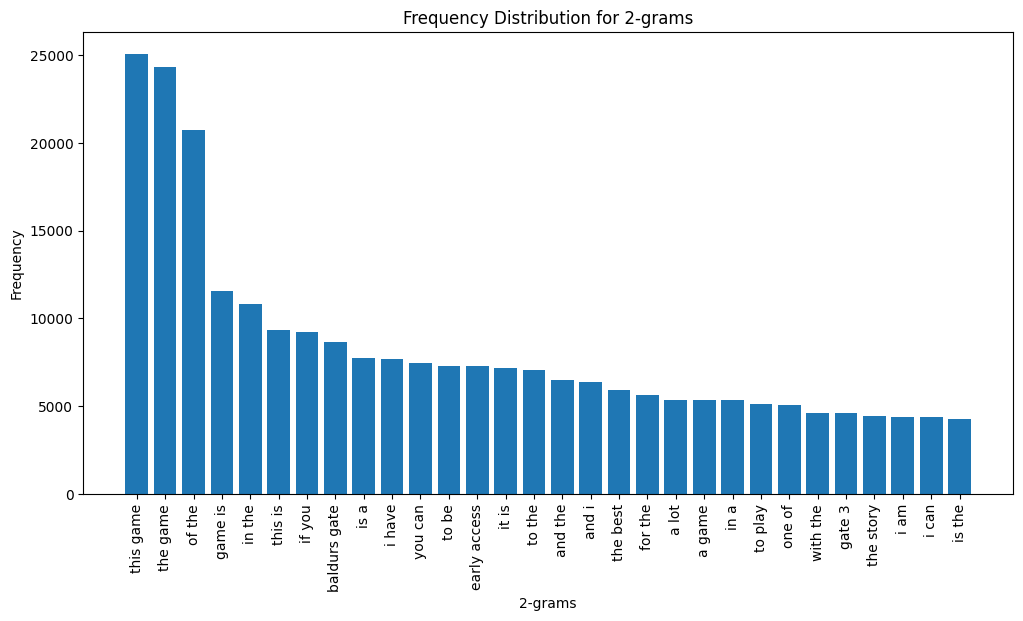

In [5]:
from nltk.util import ngrams
df_bigram = df[df['weighted_vote_score'] > 0]
df_bigram = df_bigram[df_bigram['review'].apply(lambda x: isinstance(x, str))]
df_bigram['tokens'] = df_bigram['review'].apply(forbigram)
bigram_tokens = [token for tokens in df_bigram['tokens'] for token in tokens]
bigram_freq_dist = FreqDist(bigram_tokens)
n = 2  # Set n to 2 for bigrams
all_bigrams = list(ngrams(bigram_tokens, n))
freq_dist_bigram = FreqDist(all_bigrams)

# Print the frequency distribution for bigrams
print(f"\nTop 10 Most Common Words (Bigrams):")
print(freq_dist_bigram.most_common(10))
df_bigrams = pd.DataFrame(list(freq_dist_bigram.items()), columns=['n-gram', 'frequency'])

# Sort the DataFrame by frequency in descending order
df_bigrams = df_bigrams.sort_values(by='frequency', ascending=False)

# Plot the frequency distribution for bigrams
plt.figure(figsize=(12, 6))
plt.bar(df_bigrams['n-gram'][:30].apply(lambda x: ' '.join(x)), df_bigrams['frequency'][:30])
plt.title(f'Frequency Distribution for {n}-grams')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

I notice that the above bigram model is not relevant as the word groups do not provide enough context and connections to produce insights

### Filtering the reviews based on Weighted Vote Score

In [6]:
df_filtered = df[df['weighted_vote_score'] > 0]
# Apply preprocessing to each review
# Drop rows with missing or non-string values
df_filtered = df_filtered[df_filtered['review'].apply(lambda x: isinstance(x, str))]
df_filtered['tokens'] = df_filtered['review'].apply(preprocess_review)
num_reviews = len(df_filtered)

print(f'The number of reviews in the DataFrame is: {num_reviews}')

The number of reviews in the DataFrame is: 68732


### Tokenization and First Frequency Distribution

After filtering the tokens using the function defined in the beginning for preprocessing we now use the tokens to create the first frequency distribution and word cloud.

In [7]:
# Create a frequency distribution of the tokens
all_tokens = [token for tokens in df_filtered['tokens'] for token in tokens]
freq_dist = FreqDist(all_tokens)

Top 10 Most Common Words:
[('game', 100993), ('like', 21544), ('character', 17179), ('time', 15245), ('play', 14677), ('good', 14616), ('one', 13150), ('story', 12204), ('get', 12013), ('even', 11150)]


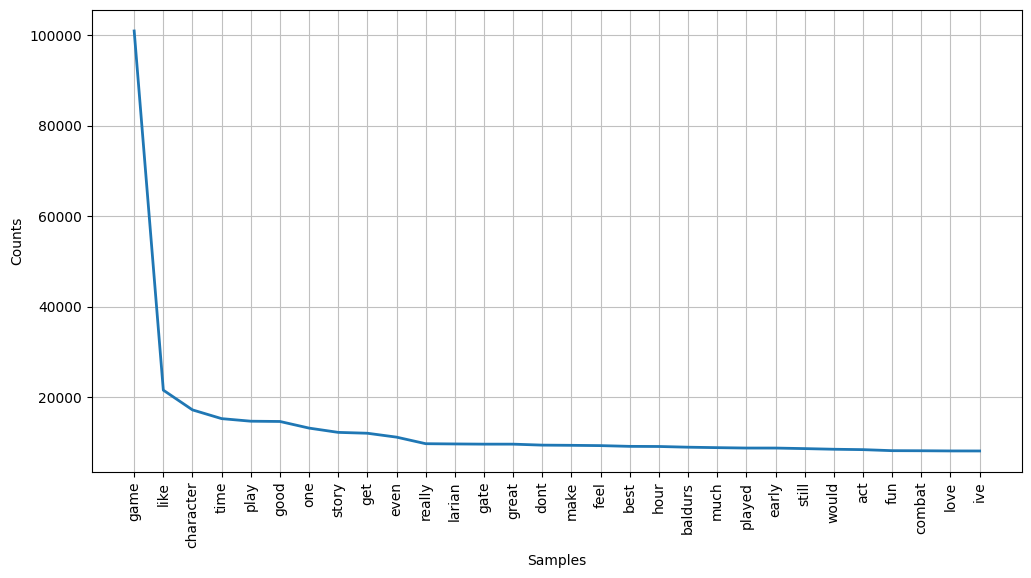

<Axes: xlabel='Samples', ylabel='Counts'>

In [15]:
# Print the frequency distribution
print("Top 10 Most Common Words:")
print(freq_dist.most_common(10))

plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)


### First Word Cloud and Second Bigram Model

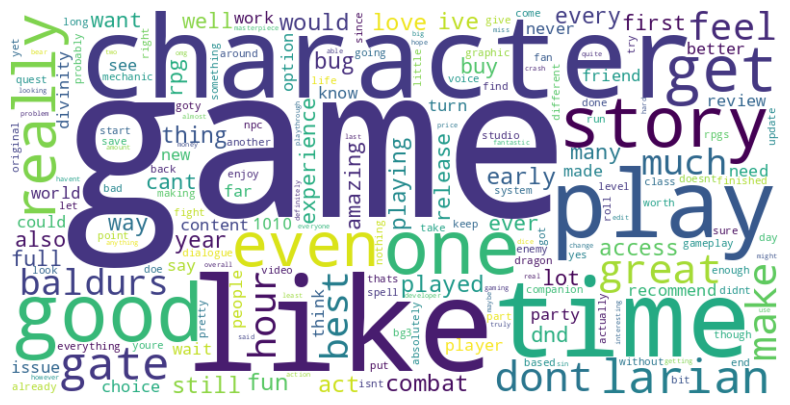

In [16]:
# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Top 10 Most Common Words (Bigrams):
[(('baldurs', 'gate'), 8716), (('early', 'access'), 7293), (('feel', 'like'), 3735), (('best', 'game'), 3330), (('larian', 'studio'), 2495), (('good', 'game'), 2359), (('great', 'game'), 2331), (('buy', 'buy'), 2330), (('game', 'year'), 2302), (('one', 'best'), 2152)]


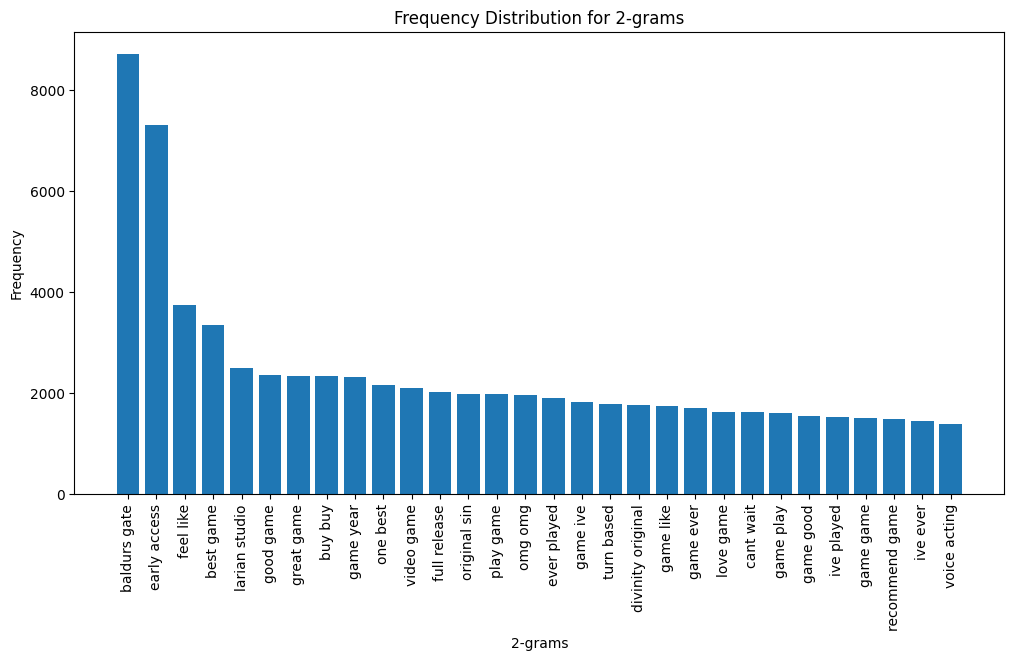

In [17]:
from nltk.util import ngrams
# Create n-grams
n = 2  # Set n to 2 for bigrams
all_ngrams = list(ngrams(all_tokens, n))
freq_dist_ngrams = FreqDist(all_ngrams)

# Print the frequency distribution for bigrams
print(f"\nTop 10 Most Common Words (Bigrams):")
print(freq_dist_ngrams.most_common(10))
df_ngrams = pd.DataFrame(list(freq_dist_ngrams.items()), columns=['n-gram', 'frequency'])

# Sort the DataFrame by frequency in descending order
df_ngrams = df_ngrams.sort_values(by='frequency', ascending=False)

# Plot the frequency distribution for bigrams
plt.figure(figsize=(12, 6))
plt.bar(df_ngrams['n-gram'][:30].apply(lambda x: ' '.join(x)), df_ngrams['frequency'][:30])
plt.title(f'Frequency Distribution for {n}-grams')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

I notice that the frequency distribution, word cloud and Bigram model contain a lot of stop words which I think need to be filtered out to have a cleaner dataset, this will in turn produce a more accurate distribution of words across the reviews posted on the site.

In [18]:
additional_stopwords = [
    "like", "character", "time", "play", "good", "one", "story", "get", "even", "really", "dont", "make", "feel",
    "great", "still", "would", "act", "fun", "love", "ive", "thing", "playing", "bug", "every", "way", "access",
    "year", "lot", "want", "well", "cant", "many", "first", "also", "experience", "amazing", "buy", "rpg", "ever",
    "full", "release", "player", "choice", "far", "see", "say", "made", "world", "recommend", "could", "divinity",
    "new", "review", "people", "think", "need", "party", "wait", "know", "option", "better", "never", "turn", "work",
    "content", "friend", "issue", "companion", "worth", "everything", "gameplay", "take", "studio", "different",
    "quest", "come", "long", "going", "give", "level", "since", "got", "something", "save", "back", "bg3", "dialogue",
    "youre", "bad", "look", "system", "based", "already", "original", "class", "pretty", "right", "point", "actually",
    "thats", "fan", "end", "find", "bit", "without", "doesnt", "little", "put", "around", "yes", "though", "done",
    "graphic", "enough", "roll", "another", "enemy", "fight", "enjoy", "nothing", "yet", "didnt", "dragon", "life",
    "let", "spell", "absolutely", "npc", "start", "keep", "day", "video", "sure", "try", "voice", "making", "finished",
    "update", "run", "probably", "part", "goty", "isnt", "masterpiece", "getting", "hard", "change", "real", "amount",
    "two", "however", "everyone", "almost", "gaming", "bear","game","larian","gate",'games',"1010","baldurs","early","bug","omg"
    ]

# Preprocess the reviews
# Combine NLTK stopwords with additional stopwords
additional_stopwords = [word.lower() for word in additional_stopwords]
sw = set(nltk.corpus.stopwords.words('english')).union(additional_stopwords)

We skip a step where we extracted top 1000 most frequent keywords and used manual and AI filtering to determine stopwords.

In [19]:
def new_preprocess_review(review):
    if isinstance(review, str):
        # Convert to lowercase
        review = review.lower()

        # Remove special characters, punctuation, and extra whitespaces
        review = ''.join(e for e in review if e.isalnum() or e.isspace())

        # Tokenize the review
        tokens = word_tokenize(review)

        # Lemmatize the tokens
        lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

        # Remove stopwords, short tokens, and additional stopwords
        filtered_tokens = [token for token in lemmatized_tokens if token not in sw and len(token) > 2]

        return filtered_tokens
    else:
        return []

In [20]:
new_df_filtered = df_filtered[df_filtered['review'].apply(lambda x: isinstance(x, str))]
new_df_filtered['tokens'] = new_df_filtered['review'].apply(new_preprocess_review)

In [21]:
# Create a frequency distribution of the tokens
new_all_tokens = [token for tokens in new_df_filtered['tokens'] for token in tokens]
freq_dist_new = FreqDist(new_all_tokens)

### Second Frequency Distribution

Top 10 Most Common Words:
[('best', 9111), ('hour', 9084), ('much', 8827), ('played', 8740), ('combat', 8140), ('dnd', 6054), ('rpgs', 2789), ('mechanic', 2771), ('doe', 2697), ('action', 2121)]


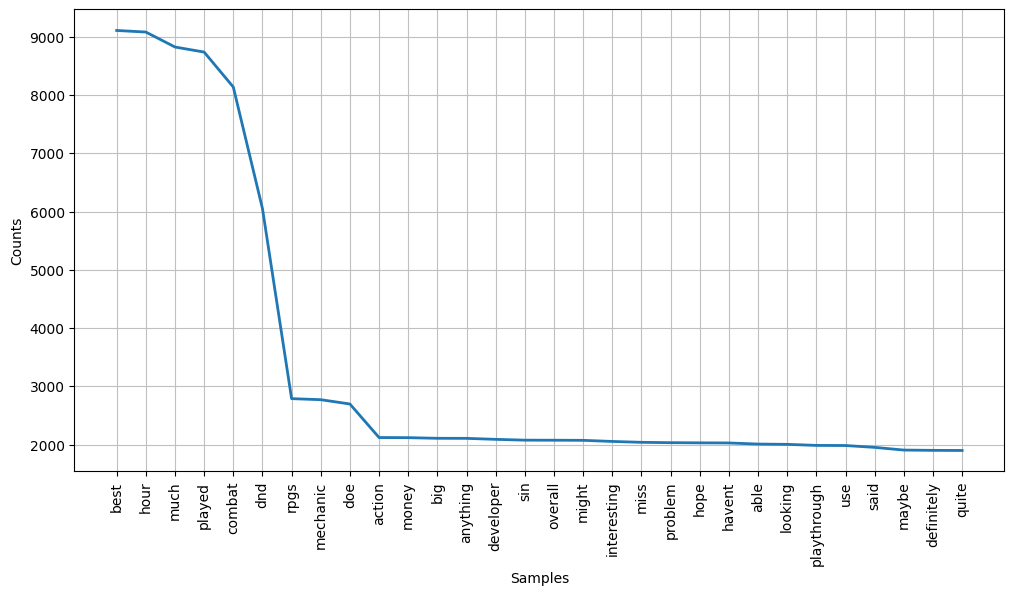

<Axes: xlabel='Samples', ylabel='Counts'>

In [22]:
# Print the frequency distribution
print("Top 10 Most Common Words:")
print(freq_dist_new.most_common(10))
plt.figure(figsize=(12, 6))
freq_dist_new.plot(30, cumulative=False)

### Second Word Cloud

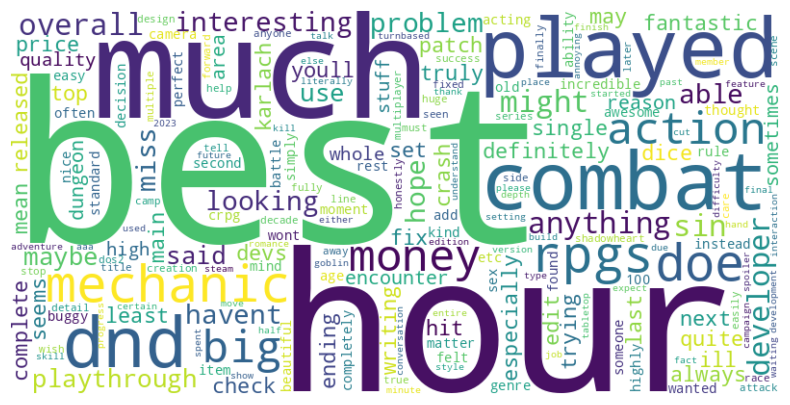

In [23]:
# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_new)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Now the unigram model is well performing both in frequency distribution and word cloud as we can identify keywords which are relevant and may later be used to categorize and determine important points talked in the reviews.

### Third Bigram model


Top 10 Most Common Words (Bigrams):
[(('best', 'played'), 1948), (('success', 'success'), 998), (('miss', 'miss'), 693), (('looking', 'forward'), 619), (('100', 'hour'), 553), (('cut', 'scene'), 533), (('age', 'origin'), 513), (('5th', 'edition'), 486), (('turnbased', 'combat'), 483), (('played', 'hour'), 458)]


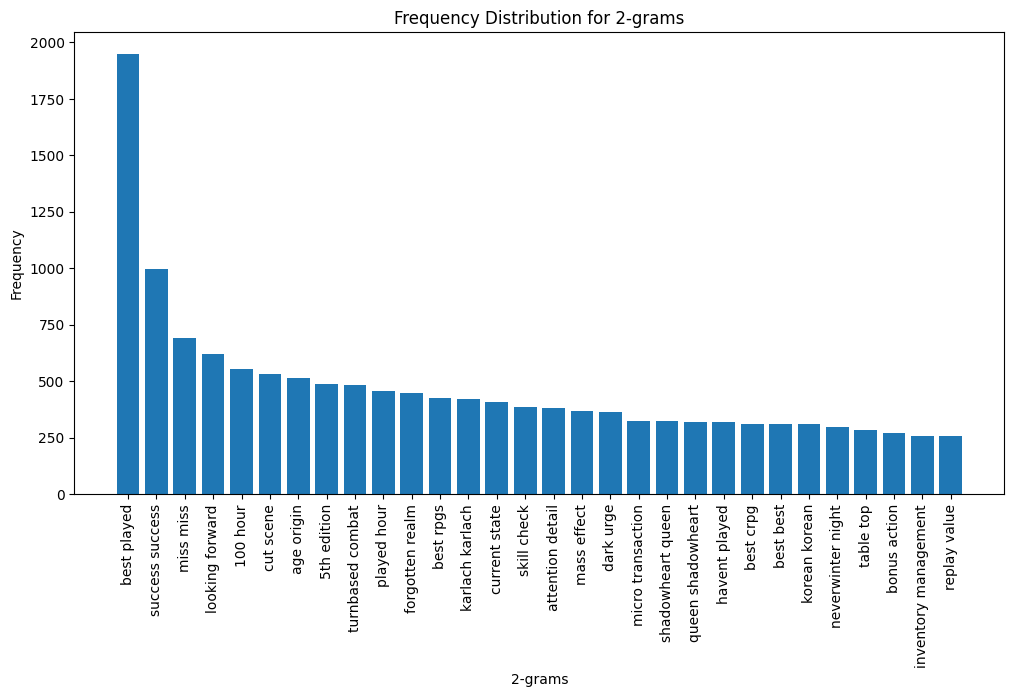

In [24]:
# Create n-grams
n = 2  # Set n to 2 for bigrams
all_ngrams = list(ngrams(new_all_tokens, n))
freq_dist_ngrams_new = FreqDist(all_ngrams)

# Print the frequency distribution for bigrams
print(f"\nTop 10 Most Common Words (Bigrams):")
print(freq_dist_ngrams_new.most_common(10))
df_ngrams_new = pd.DataFrame(list(freq_dist_ngrams_new.items()), columns=['n-gram', 'frequency'])

# Sort the DataFrame by frequency in descending order
df_ngrams_new = df_ngrams_new.sort_values(by='frequency', ascending=False)

# Plot the frequency distribution for bigrams
plt.figure(figsize=(12, 6))
plt.bar(df_ngrams_new['n-gram'][:30].apply(lambda x: ' '.join(x)), df_ngrams_new['frequency'][:30])
plt.title(f'Frequency Distribution for {n}-grams')
plt.xlabel(f'{n}-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Even tho this bigram model is better than the previous one, I notice that there are several instances of repetation of words in the bigram model. To remove them from my model, I run another function which only allows tokens to form if they are composed of unique words.

### Final Bigram Model


Top 10 Most Common Words (Filtered 2-grams):
[(('best', 'played'), 1948), (('looking', 'forward'), 619), (('100', 'hour'), 553), (('cut', 'scene'), 533), (('age', 'origin'), 513), (('5th', 'edition'), 486), (('turnbased', 'combat'), 483), (('played', 'hour'), 458), (('forgotten', 'realm'), 447), (('best', 'rpgs'), 425)]


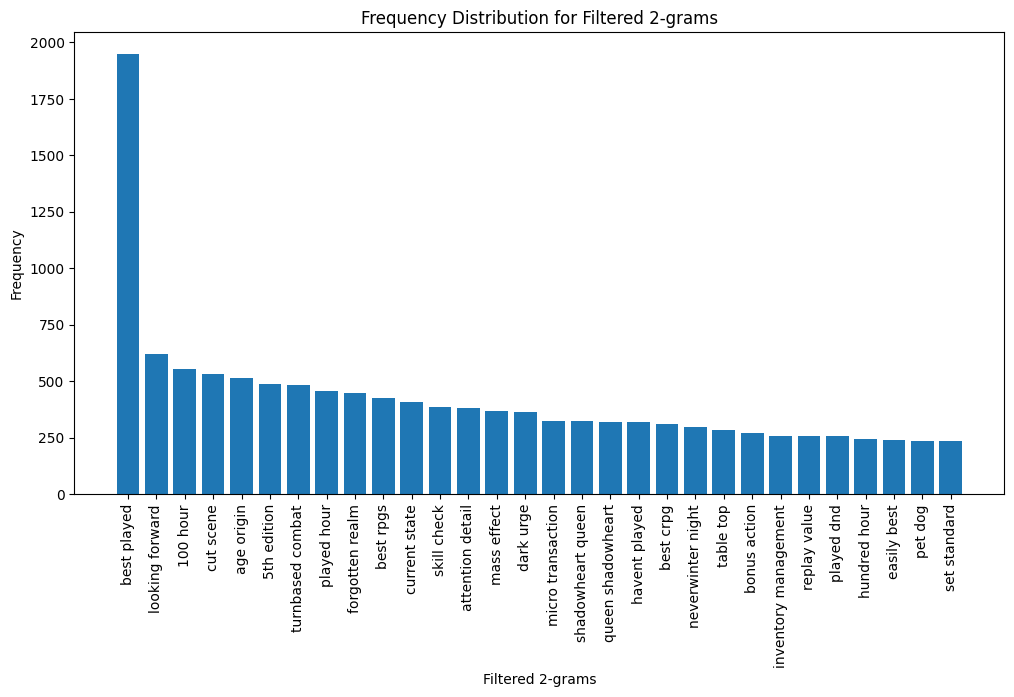

In [25]:
# Create n-grams
n = 2  # Set n to 2 for bigrams
all_ngrams_1 = list(ngrams(new_all_tokens, n))

# Filter out n-grams with repeated words
filtered_ngrams_1 = [ngram for ngram in all_ngrams_1 if len(set(ngram)) == len(ngram)]

freq_dist_ngrams_new_1 = FreqDist(filtered_ngrams_1)

# Print the frequency distribution for bigrams
print(f"\nTop 10 Most Common Words (Filtered {n}-grams):")
print(freq_dist_ngrams_new_1.most_common(10))

df_ngrams_new_1 = pd.DataFrame(list(freq_dist_ngrams_new_1.items()), columns=['n-gram', 'frequency'])

# Sort the DataFrame by frequency in descending order
df_ngrams_new_1 = df_ngrams_new_1.sort_values(by='frequency', ascending=False)

# Plot the frequency distribution for bigrams
plt.figure(figsize=(12, 6))
plt.bar(df_ngrams_new_1['n-gram'][:30].apply(lambda x: ' '.join(x)), df_ngrams_new_1['frequency'][:30])
plt.title(f'Frequency Distribution for Filtered {n}-grams')
plt.xlabel(f'Filtered {n}-grams')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

### Final Word Cloud

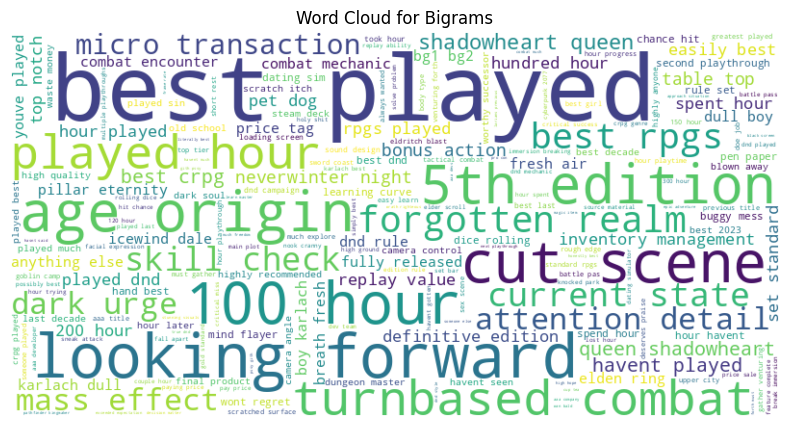

In [26]:
freq_dist_ngrams_new = {' '.join(k): v for k, v in freq_dist_ngrams_new_1.items()}

# Generate and display the word cloud for bigrams
wordcloud_bigrams = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dist_ngrams_new)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigrams, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Bigrams')
plt.show()

Finally, the word cloud and frequency distribution are producing relevant results for the keywords, providing the valuable insights regarding the overall parts of the game that players liked and appreciated which may correlate towards the success of the game and eventually winning "Game of the Year".